<a href="https://colab.research.google.com/github/mumumu99/Image-Classification/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/15
80/80 [==============================] - 4s 40ms/step - loss: 1.7464 - accuracy: 0.4020 - val_loss: 3.7960 - val_accuracy: 0.0980
Epoch 2/15
80/80 [==============================] - 3s 35ms/step - loss: 1.0624 - accuracy: 0.6206 - val_loss: 6.6234 - val_accuracy: 0.0982
Epoch 3/15
80/80 [==============================] - 3s 35ms/step - loss: 0.8565 - accuracy: 0.6991 - val_loss: 7.7677 - val_accuracy: 0.1022
Epoch 4/15
80/80 [==============================] - 3s 35ms/step - loss: 0.7147 - accuracy: 0.7502 - val_loss: 8.8304 - val_accuracy: 0.1264
Epoch 5/15
80/80 [==============================] - 3s 35ms/step - loss: 0.6099 - accuracy: 0.7892 - val_loss: 5.0407 - val_accuracy: 0.1880
Epoch 6/15
80/80 [==============================] - 3s 37ms/step - loss: 0.5170 - accuracy: 0.8229 - val_loss: 3.9977 - val_accuracy: 0.2420
Epoch 7/15
80/80 [==============================] - 3s 35ms/step - loss: 0.4545 - accuracy: 0.8437 - val_loss: 1.6834 - val_accuracy: 0.5317
Epoch 8/15
80

<BarContainer object of 10 artists>

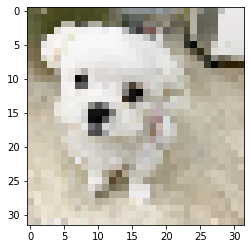

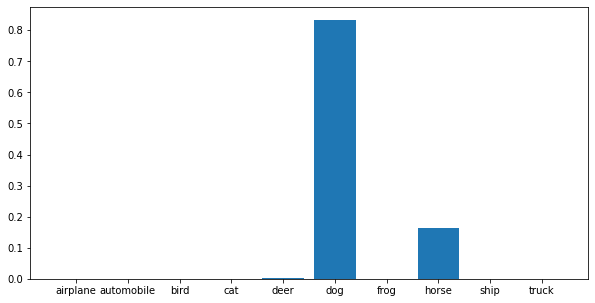

In [2]:
import keras
from keras.utils import to_categorical
from keras import models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import cifar10
(x,y), (xt,yt) = cifar10.load_data()

label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

x1 = x/255.0
xt1 = xt/255.0
y1 = to_categorical(y)
yt1 = to_categorical(yt)

model = models.Sequential()
model.add(layers.Conv2D(filters=16,
                        kernel_size=4,
                        padding='same',
                        strides=1,
                        activation='relu',
                        input_shape=(32,32,3,)))
model.add(layers.MaxPool2D(pool_size=2, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.05))

model.add(layers.Conv2D(filters=32,
                        kernel_size=4,
                        padding='same',
                        strides=1,
                        activation='relu',
                        input_shape=(32,32,3,)))
model.add(layers.MaxPool2D(pool_size=2, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.05))

model.add(layers.Conv2D(filters=64,
                        kernel_size=4,
                        padding='same',
                        strides=1,
                        activation='relu',
                        input_shape=(32,32,3,)))
model.add(layers.MaxPool2D(pool_size=2, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.05))

model.add(layers.Flatten())
model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(
    loss = "categorical_crossentropy",
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.fit(x1, y1, batch_size=500, epochs=15, validation_split=0.2)

filename = 'dog.jpg'
from keras.preprocessing import image
testimg = image.load_img(filename, target_size=(32,32))
plt.imshow(np.uint8(testimg))
img = image.img_to_array(testimg)

my = np.expand_dims(img, axis=0)

my1 = my/255.0
output = model.predict(my1)
x_index = np.arange(len(label))
output = output.reshape(10)
plt.figure(figsize=(10,5))
plt.bar(x_index, output, tick_label=label, align='center')